In [10]:
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
import dowhy.datasets

In [11]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=10000, 
        treatment_is_binary=True,
        num_discrete_common_causes=1)
df = data["df"]
print(df.head())
print(data["dot_graph"])
print("\n")
print(data["gml_graph"])

         X0   Z0        Z1        W0        W1        W2        W3 W4    v0  \
0  1.303872  1.0  0.026432 -3.051179  0.999466 -0.315030 -0.044345  3  True   
1  0.661170  0.0  0.238909 -1.138019  0.194049 -0.348404 -0.032860  3  True   
2  1.469910  1.0  0.676761 -1.378910  1.501478  0.493014  0.959762  1  True   
3  1.493692  0.0  0.368712 -0.659601  0.533298  1.105985  1.839834  3  True   
4  0.687648  1.0  0.872049 -1.450579 -0.492125  1.517174  0.517676  1  True   

           y  
0   4.074462  
1   7.788511  
2  11.338840  
3  16.276078  
4  10.324007  
digraph { U[label="Unobserved Confounders"]; U->y;v0->y; U->v0;W0-> v0; W1-> v0; W2-> v0; W3-> v0; W4-> v0;Z0-> v0; Z1-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;X0-> y;}


graph[directed 1node[ id "y" label "y"]node[ id "Unobserved Confounders" label "Unobserved Confounders"]edge[source "Unobserved Confounders" target "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[

In [24]:
data["observed_node_names"]

KeyError: 'observed_node_names'

In [26]:
df

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y,propensity_score,strata,dbar,d_y,dbar_y
0,1.303872,1.0,0.026432,-3.051179,0.999466,-0.315030,-0.044345,3,True,4.074462,0.992289,6.0,0,4.074462,0.0
1,0.661170,0.0,0.238909,-1.138019,0.194049,-0.348404,-0.032860,3,True,7.788511,0.997086,12.0,0,7.788511,0.0
2,1.469910,1.0,0.676761,-1.378910,1.501478,0.493014,0.959762,1,True,11.338840,0.999160,24.0,0,11.338840,0.0
3,1.493692,0.0,0.368712,-0.659601,0.533298,1.105985,1.839834,3,True,16.276078,0.999564,31.0,0,16.276078,0.0
4,0.687648,1.0,0.872049,-1.450579,-0.492125,1.517174,0.517676,1,True,10.324007,0.998870,21.0,0,10.324007,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.793828,0.0,0.743993,-0.710928,-0.094547,1.236368,0.551983,1,True,11.807165,0.999358,27.0,0,11.807165,0.0
9996,1.145491,1.0,0.557876,-0.971004,1.167996,-0.454124,1.995557,2,True,14.376797,0.998272,17.0,0,14.376797,0.0
9997,-0.510487,0.0,0.369601,-0.726598,0.697566,1.317267,2.101709,0,True,15.912146,0.994857,9.0,0,15.912146,0.0
9998,-0.385172,1.0,0.864135,-0.785380,0.660017,0.217994,2.476926,1,True,16.035801,0.998706,19.0,0,16.035801,0.0


In [13]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']


In [ ]:
data["treatment_name"]

In [16]:
model.view_model()

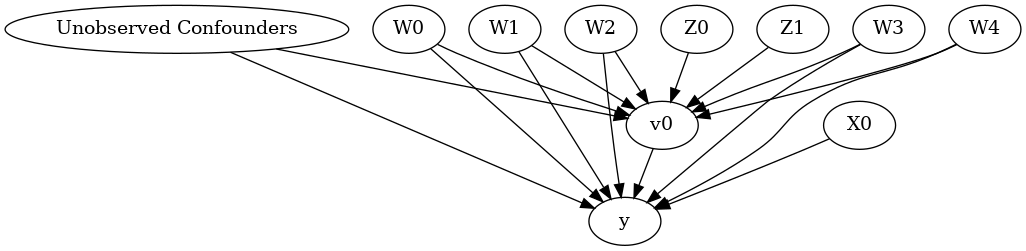

In [17]:

from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [18]:

identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['W1', 'W2', 'W4', 'Unobserved Confounders', 'W0', 'W3']
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['Z0', 'Z1']
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W1,W2,W4,W0,W3))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W2,W4,W0,W3,U) = P(y|v0,W1,W2,W4,W0,W3)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z0, Z1])*Derivative([v0], [Z0, Z1])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)



In [19]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W2+W4+W0+W3
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W1,W2,W4,W0,W3))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W2,W4,W0,W3,U) = P(y|v0,W1,W2,W4,W0,W3)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z0, Z1])*Derivative([v0], [Z0, Z1])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)

## Realized estimand
b: y~v0+W1+W2+W4+W0+W3
Target units: ate

## Estimate
Mean value: 10.472547358122577

Causal Estimate is 10.472547358122577
/home/pascal/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: Dat

In [9]:
# IV. Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W2+W4+W0+W3+w_random
/home/pascal/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
